<a href="https://colab.research.google.com/github/ShuklaHariOm/formula1-data-practice/blob/main/abu-dhabi-gp-21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [3]:
import os

# Create the cache directory if it doesn't exist
os.makedirs('cache', exist_ok=True)

# Enable cache
ff1.Cache.enable_cache('cache')

In [4]:
# Setup plotting
plotting.setup_mpl()

In [5]:
quali = ff1.get_session(2021, 'Abu Dhabi', 'Q')
quali.load()
laps = quali.laps

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Abu Dhabi Grand Prix - Qualifying [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for 

In [6]:
# Select the laps from Hamilton and Verstappen
laps_ver = laps.pick_driver('VER')
laps_ham = laps.pick_driver('HAM')

/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [7]:
# Get the telemetry data from their fastest lap
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()

In [8]:
# Since the telemetry data does not have a variable that indicates the driver,
# we need to create that column

fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'

In [9]:
# Merge both lap telemetries so we have everything in one DataFrame
telemetry = pd.concat([fastest_ver, fastest_ham])

In [10]:
telemetry.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Distance', 'Driver'],
      dtype='object')

In [11]:
quali.results[['FullName', 'Position', 'TeamName', 'Q1']]

,FullName,Position,TeamName,Q1
33,Max Verstappen,1.0,Red Bull Racing,0 days 00:01:23.322000
44,Lewis Hamilton,2.0,Mercedes,0 days 00:01:22.845000
4,Lando Norris,3.0,McLaren,0 days 00:01:23.553000
11,Sergio Perez,4.0,Red Bull Racing,0 days 00:01:23.350000
55,Carlos Sainz,5.0,Ferrari,0 days 00:01:23.624000
77,Valtteri Bottas,6.0,Mercedes,0 days 00:01:23.117000
16,Charles Leclerc,7.0,Ferrari,0 days 00:01:23.467000
22,Yuki Tsunoda,8.0,AlphaTauri,0 days 00:01:23.428000
31,Esteban Ocon,9.0,Alpine,0 days 00:01:23.764000
3,Daniel Ricciardo,10.0,McLaren,0 days 00:01:23.829000


In [12]:
# We want 25 mini-sectors (this can be adjusted up and down)
num_minisectors = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors
minisector_length = total_distance / num_minisectors

In [13]:
# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [14]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [15]:
# Calculate avg. speed per driver per mini sector
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

In [16]:
average_speed

,Minisector,Driver,Speed
0,1,HAM,260.907841
1,1,VER,260.874499
2,2,HAM,229.989059
3,2,VER,236.766134
4,3,HAM,221.169326
5,3,VER,216.939754
6,4,HAM,265.143675
7,4,VER,265.285500
8,5,HAM,279.377174
9,5,VER,279.975764


In [18]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})
fastest_driver

,Minisector,Fastest_driver
0,1,HAM
3,2,VER
4,3,HAM
7,4,VER
9,5,VER
11,6,VER
13,7,VER
14,8,HAM
16,9,HAM
19,10,VER


In [26]:
# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'], validate='many_to_one')

In [27]:
# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Status,X,Y,Z,Distance,Driver,Minisector,Fastest_driver_x,Fastest_driver_y,Fastest_driver
0,2021-12-11 13:52:51.006,0 days 01:07:50.822000,,366.041667,0 days 00:00:00,10950.874860,237.125004,5,100.0,False,...,OnTrack,530.462471,2074.994770,-239.000002,0.000000,VER,1,HAM,HAM,HAM
1,2021-12-11 14:01:17.236,0 days 01:16:17.052000,,3313.952500,0 days 00:00:00,11172.637555,237.983334,6,100.0,False,...,OnTrack,544.683894,2076.803647,-239.000023,0.000000,HAM,1,HAM,HAM,HAM
2,2021-12-11 13:52:51.029,0 days 01:07:50.845000,,366.041667,0 days 00:00:00.023000,10925.670903,237.795831,5,100.0,False,...,OnTrack,546.000000,2077.000000,-239.000000,1.519251,VER,1,HAM,HAM,HAM
3,2021-12-11 13:52:51.036,0 days 01:07:50.852000,,366.041667,0 days 00:00:00.030000,10918.000000,238.000000,6,100.0,False,...,OnTrack,550.712550,2077.611167,-238.999999,1.982029,VER,1,HAM,HAM,HAM
4,2021-12-11 14:01:17.309,0 days 01:16:17.125000,,3313.952500,0 days 00:00:00.073000,11235.600000,239.200000,6,100.0,False,...,OnTrack,593.000000,2083.000000,-239.000000,4.850444,HAM,1,HAM,HAM,HAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,2021-12-11 13:54:13.049,0 days 01:09:12.865000,31,835.073333,0 days 00:01:22.043000,11954.275181,232.104165,5,100.0,False,...,OnTrack,492.000000,2070.000000,-239.000000,5211.651767,VER,25,VER,VER,VER
1435,2021-12-11 14:02:39.478,0 days 01:17:39.294000,16,1994.928333,0 days 00:01:22.242000,11567.000000,228.000000,5,100.0,False,...,OnTrack,381.504551,2057.049150,-238.738444,5212.406891,HAM,25,VER,VER,VER
1436,2021-12-11 13:54:13.115,0 days 01:09:12.931000,31,835.073333,0 days 00:01:22.109000,11767.824819,233.479168,5,100.0,False,...,OnTrack,537.511902,2075.461204,-239.128166,5215.932218,VER,25,VER,VER,VER
1437,2021-12-11 14:02:39.549,0 days 01:17:39.365000,16,1994.928333,0 days 00:01:22.313000,11447.187824,230.366660,5,100.0,False,...,OnTrack,425.000000,2061.000000,-239.000000,5216.950233,HAM,25,VER,VER,VER


In [29]:
# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 2

/tmp/ipython-input-34-3344631240.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('winter', 2)


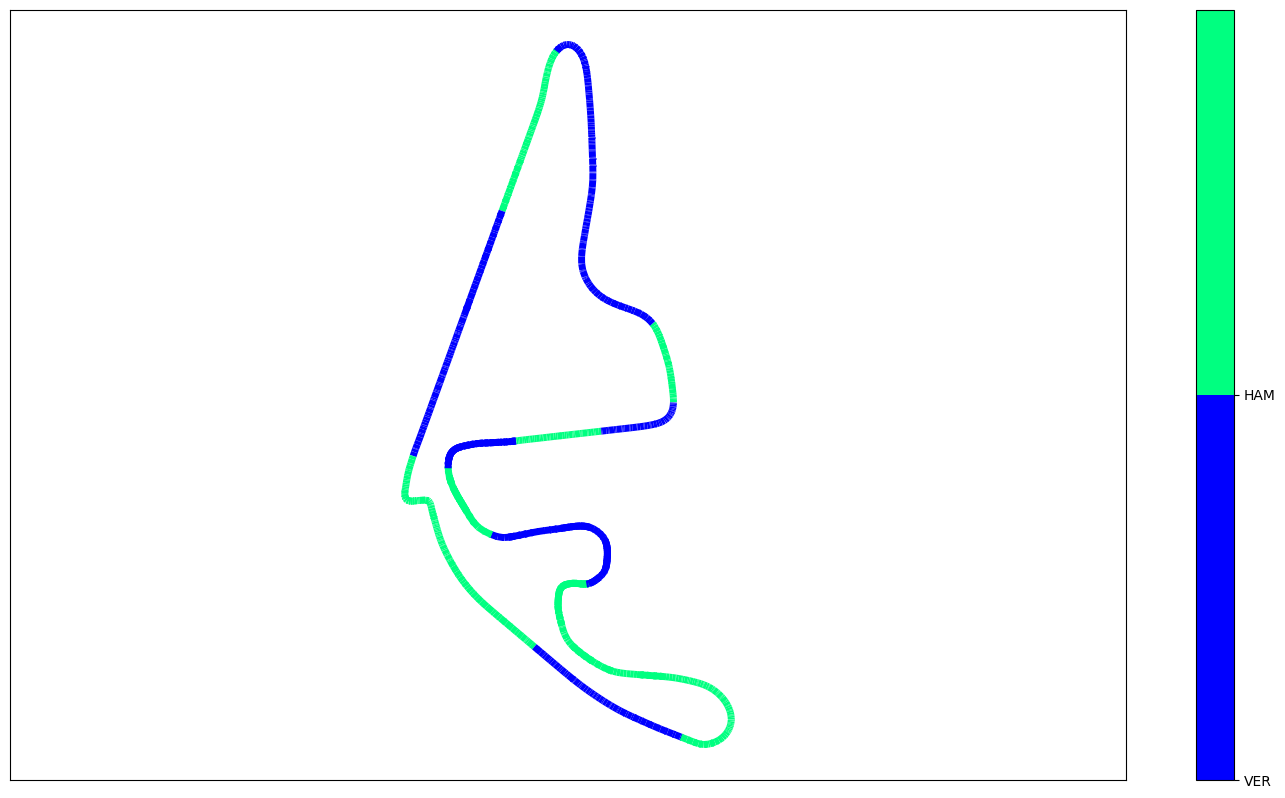

In [34]:
# Plotting the Data!

x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks([1, 2])
cbar.set_ticklabels(['VER', 'HAM'])

plt.savefig(f"2021_ver_ham_q.png", dpi=300)

plt.show()